In [1]:
from numpy import *
import matplotlib.pyplot as plt
import vorbin
from vorbin.voronoi_2d_binning import voronoi_2d_binning
import pandas
from sklearn import preprocessing
from PlotFuncs import *

df = pandas.read_csv('../data/Gaia-SDSS.csv')

In [2]:
yd = (df.E).values/1.0e5
xd = (df.Jphi).values
feh = (df.feh).values

rx = (amax(xd)-amin(xd))
ry = (amax(xd)-amin(xd))
cx = amin(xd)
cy = amin(yd)

xd = (xd-amin(xd))/(amax(xd)-amin(xd))
yd = (yd-amin(yd))/(amax(yd)-amin(yd))

nbins = 200
signal,xb,yb = histogram2d(xd,yd,bins=nbins,range=((-0.0001,1.0001),(-0.0001,1.0001)))
xc = (xb[0:-1]+xb[1:])/2.0
yc = (yb[0:-1]+yb[1:])/2.0
x,y = meshgrid(xc,yc)
x = x.reshape(nbins**2)
y = y.reshape(nbins**2)
ix = digitize(xd,xb,right=True)-1
iy = digitize(yd,yb,right=True)-1

signal = (signal.reshape(nbins**2)).T
x = x[signal>0]
y = y[signal>0]
signal = signal[signal>0]
noise = ones(shape=shape(signal))

signal2 = zeros(shape=(nbins,nbins))
for i in range(0,nbins):
    for j in range(0,nbins):
        mask = (ix==i)&(iy==j)
        signal2[i,j] = mean(abs(df.GalRecZ[mask]).values)
signal2 = signal2.reshape(nbins**2)
signal2 = signal2[~isnan(signal2)]

/Users/ciaranohare/anaconda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

/Users/ciaranohare/anaconda/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



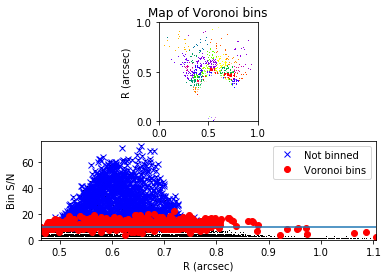

In [3]:
targetSN = 10.0
binNum, xNode, yNode, xBar, yBar, sn, nPixels, scale = voronoi_2d_binning(y, x, signal, noise, targetSN, plot=1, quiet=1)

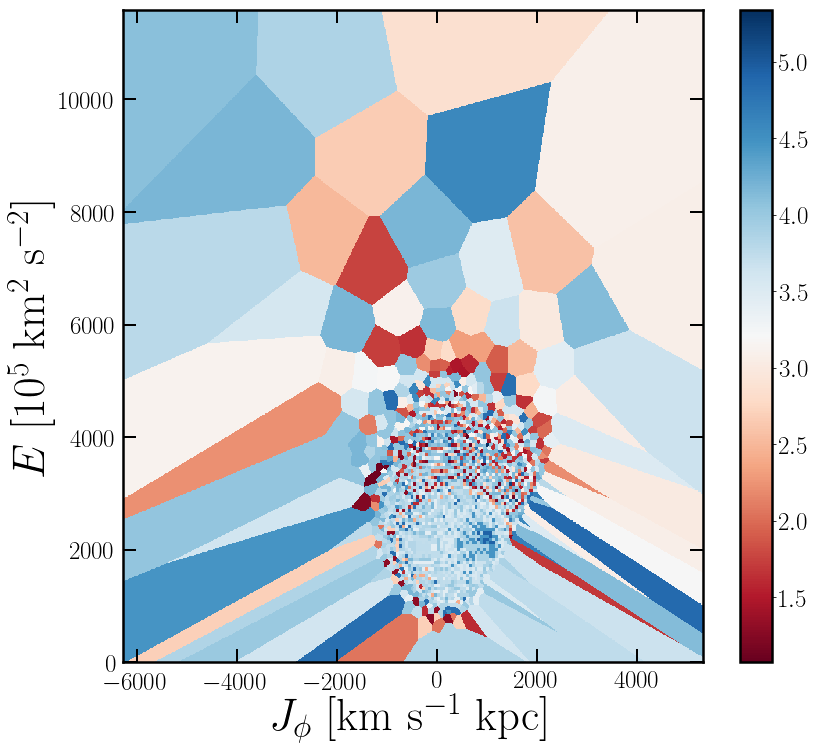

In [5]:
nfine = 1000
xfine = linspace(0.0,1.0,nfine)
yfine = linspace(0.0,1.0,nfine)
xx,yy = meshgrid(xfine,yfine)

Zi = zeros(shape=(nfine,nfine))
for i in range(0,nfine):
    for j in range(0,nfine):
        xi = xx[i,j]
        yi = yy[i,j]
        Zi[i,j] = binNum[argmin((xi-xNode)**2.0+(yi-yNode)**2.0)]

Z = zeros(shape=(nfine,nfine))
for i in range(0,amax(binNum)):
    Z[Zi==i] = mean(signal2[binNum==i])
    
    

rlab = r'$\log_{10}(J_R/[\textrm{km s}^{-1}\,\textrm{kpc}])$'
plab = '$J_\phi$ [km s$^{-1}$ kpc]'
zlab = r'$\log_{10}(J_z/[\textrm{km s}^{-1}\,\textrm{kpc}])$'
Elab = r'$E$ [$10^5$ km$^2$ s$^{-2}$]'
fig,ax1 = MySquarePlot(plab,Elab)

plt.imshow(Z, interpolation='nearest',
   extent=(xx.min()*rx+cx, xx.max()*rx+cx, yy.min()*ry+cy, yy.max()*ry+cy),
   cmap=plt.cm.RdBu,
   aspect='auto', origin='lower')
plt.colorbar()

plt.show()

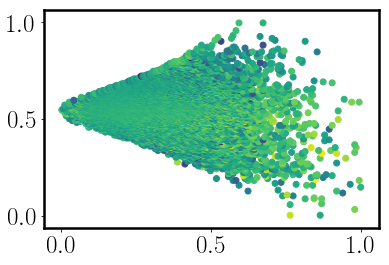

In [207]:
plt.scatter(x,y,c=FEH)
plt.show()


In [140]:
mean((df.feh[mask]).values)

/Users/ciaranohare/anaconda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

/Users/ciaranohare/anaconda/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



nan

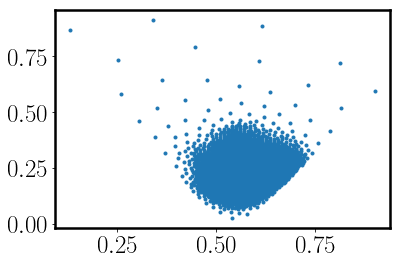

In [114]:
from PlotFuncs import *

rlab = r'$\log_{10}(J_R/[\textrm{km s}^{-1}\,\textrm{kpc}])$'
plab = '$J_\phi$ [km s$^{-1}$ kpc]'
zlab = r'$\log_{10}(J_z/[\textrm{km s}^{-1}\,\textrm{kpc}])$'
Elab = r'$E$ [$10^5$ km$^2$ s$^{-2}$]'
fig,ax1 = MySquarePlot(plab,Elab)

plt.imshow(Z, interpolation='nearest',
   extent=(xx.min(), xx.max(), yy.min(), yy.max()),
   cmap=plt.cm.RdBu,
   aspect='auto', origin='lower')
plt.colorbar()

plt.show()

In [125]:
ix = digitize(xd,xb)
iy = digitize(yd,yb)
FEH = zeros(shape=(nbins,nbins))
for i in range(0,nbins):
    for j in range(0,nbins):
        mask = (ix==i)&(iy==j)
        FEH[i,j] = mean(df.feh[mask])
FEH = FEH.reshape(nbins**2)
FEH = FEH[~isnan(FEH)]

In [130]:
FEH[~isnan(FEH)]

array([-0.685301, -1.687517, -1.060998, ..., -1.946773, -1.540678,
       -1.431226])

In [129]:
df.feh[mask]

Series([], Name: feh, dtype: float64)